<a href="https://colab.research.google.com/github/liryelbeloaguiar/Analises/blob/main/inmet_natal_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS

## Bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
#imports

## Leitura da Tabela

In [ ]:
vari = 'https://raw.githubusercontent.com/LiryelBA/Metereologia2/main/tabela5457%20(1).csv'
dfMet = pd.read_csv(vari, delimiter=";", quotechar='"')

ParserError: ignored

## Visualizar a Tabela

In [ ]:
dfMet.head(25)

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,01/01/2020,0,"27,3","27,4","27,1","80,0","81,0","79,0","23,7","23,8","23,2","1006,4","1006,4","1006,1","2,7","107,0","6,0",NaN,"0,0"
1,01/01/2020,100,"27,1","27,3","26,8","81,0","82,0","80,0","23,5","23,6","23,4","1006,8","1006,8","1006,4","2,7","108,0","6,1",NaN,"0,0"
2,01/01/2020,200,"27,1","27,1","27,0","80,0","81,0","80,0","23,3","23,6","23,3","1006,7","1006,8","1006,7","3,1","103,0","6,3",NaN,"0,0"
3,01/01/2020,300,"27,1","27,1","26,9","81,0","81,0","80,0","23,5","23,5","23,3","1006,3","1006,7","1006,3","2,4","110,0","6,3",NaN,"0,0"
4,01/01/2020,400,"27,0","27,1","27,0","81,0","82,0","81,0","23,4","23,6","23,4","1005,5","1006,3","1005,5","3,2","118,0","5,5",NaN,"0,0"
5,01/01/2020,500,"26,9","27,0","26,9","81,0","81,0","80,0","23,3","23,5","23,3","1005,2","1005,6","1005,2","2,8","111,0","5,8",NaN,"0,0"
6,01/01/2020,600,"26,8","26,9","26,8","82,0","82,0","81,0","23,4","23,4","23,2","1005,1","1005,2","1005,0","2,5","110,0","5,1",NaN,"0,0"
7,01/01/2020,700,"26,8","26,9","26,8","82,0","82,0","81,0","23,4","23,4","23,3","1005,5","1005,5","1005,1","2,3","109,0","4,7",NaN,"0,0"
8,01/01/2020,800,"26,8","26,9","26,7","81,0","82,0","81,0","23,3","23,5","23,3","1005,9","1005,9","1005,5","1,8","103,0","4,1",NaN,"0,0"
9,01/01/2020,900,"26,8","26,8","26,6","82,0","83,0","81,0","23,4","23,6","23,2","1006,5","1006,5","1005,9","1,8","115,0","3,6","14,30","0,0"


> ° Na tabela acima de dados metereologicos pode-se observar que há uma leitura de dados aconcetendo de 00:00 até 00:00 do dia seguinte.

> ° Pode-se notar também que na coluna que diz respeito a radiação existem dados incompletos, não lidos. (NaN)

# Informações sobre a Tabela



## Descrições

In [ ]:
#verifica quantas amostras possuem valor NaN por coluna
dfMet.isna().sum()

Data                       0
Hora (UTC)                 0
Temp. Ins. (C)           637
Temp. Max. (C)           641
Temp. Min. (C)           641
Umi. Ins. (%)            637
Umi. Max. (%)            641
Umi. Min. (%)            641
Pto Orvalho Ins. (C)     637
Pto Orvalho Max. (C)     641
Pto Orvalho Min. (C)     641
Pressao Ins. (hPa)       637
Pressao Max. (hPa)       641
Pressao Min. (hPa)       641
Vel. Vento (m/s)         637
Dir. Vento (m/s)         637
Raj. Vento (m/s)         651
Radiacao (KJ/m²)        3957
Chuva (mm)               637
dtype: int64

>° Quantidade de dados dessa mesma forma que existem ao longo da tabela inteira

In [ ]:
# Porcentagem dos valores ausentes
dfMet.isna().mean()

Data                    0.000000
Hora (UTC)              0.000000
Temp. Ins. (C)          0.072518
Temp. Max. (C)          0.072974
Temp. Min. (C)          0.072974
Umi. Ins. (%)           0.072518
Umi. Max. (%)           0.072974
Umi. Min. (%)           0.072974
Pto Orvalho Ins. (C)    0.072518
Pto Orvalho Max. (C)    0.072974
Pto Orvalho Min. (C)    0.072974
Pressao Ins. (hPa)      0.072518
Pressao Max. (hPa)      0.072974
Pressao Min. (hPa)      0.072974
Vel. Vento (m/s)        0.072518
Dir. Vento (m/s)        0.072518
Raj. Vento (m/s)        0.074112
Radiacao (KJ/m²)        0.450478
Chuva (mm)              0.072518
dtype: float64

In [ ]:
# Esse método imprime informações sobre um DataFrame
dfMet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  8784 non-null   object
 1   Hora (UTC)            8784 non-null   int64 
 2   Temp. Ins. (C)        8147 non-null   object
 3   Temp. Max. (C)        8143 non-null   object
 4   Temp. Min. (C)        8143 non-null   object
 5   Umi. Ins. (%)         8147 non-null   object
 6   Umi. Max. (%)         8143 non-null   object
 7   Umi. Min. (%)         8143 non-null   object
 8   Pto Orvalho Ins. (C)  8147 non-null   object
 9   Pto Orvalho Max. (C)  8143 non-null   object
 10  Pto Orvalho Min. (C)  8143 non-null   object
 11  Pressao Ins. (hPa)    8147 non-null   object
 12  Pressao Max. (hPa)    8143 non-null   object
 13  Pressao Min. (hPa)    8143 non-null   object
 14  Vel. Vento (m/s)      8147 non-null   object
 15  Dir. Vento (m/s)      8147 non-null   

## Descrições Numericas

In [ ]:
#descrição estatística das colunas numéricas
dfMet.describe()

,Hora (UTC)
count,8784.000000
mean,1150.000000
std,692.258061
min,0.000000
25%,575.000000
50%,1150.000000
75%,1725.000000
max,2300.000000


>**count:** número de observações não nulas

>**mean:** média dos valores

>**std:**desvio padrão

>**max:** valor máximo

>**min:** valor mínimo

In [ ]:
#inclui apenas colunas categóricas na descrição
dfMet.describe(include='object')

,Data,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
count,8784,8147,8143,8143,8147,8143,8143,8147,8143,8143,8147,8143,8143,8147,8147,8133,4827,8147
unique,366,117,122,109,51,46,54,87,90,89,113,114,112,86,279,153,4280,83
top,01/01/2020,"27,7","28,2","27,1","77,0","80,0","78,0","24,0","23,9","23,1","1007,2","1007,2","1006,8","3,7","139,0","7,8","0,10","0,0"
freq,24,183,158,190,380,402,357,272,254,257,200,208,202,215,167,145,12,7236


>**unique:** quantidade de valores únicos

>**top:** é o valor mais comum

>**freq:** é a frequência do valor mais comum

# Limpeza dos dados

## Removendo NaN

In [ ]:
# Remoção dos valores nulos
dfMet.dropna(inplace=True) # o default do dropna é axis = 0 (linhas) / axis = 1 apagaria colunas

In [ ]:
#verificação de quantas amostras com valor NaN sobraram em cada coluna
dfMet.isna().sum()

Data                    0
Hora (UTC)              0
Temp. Ins. (C)          0
Temp. Max. (C)          0
Temp. Min. (C)          0
Umi. Ins. (%)           0
Umi. Max. (%)           0
Umi. Min. (%)           0
Pto Orvalho Ins. (C)    0
Pto Orvalho Max. (C)    0
Pto Orvalho Min. (C)    0
Pressao Ins. (hPa)      0
Pressao Max. (hPa)      0
Pressao Min. (hPa)      0
Vel. Vento (m/s)        0
Dir. Vento (m/s)        0
Raj. Vento (m/s)        0
Radiacao (KJ/m²)        0
Chuva (mm)              0
dtype: int64

## Tranformando Object's em float's

In [ ]:
auxiliar = dfMet
datacrono = dfMet[['Data', 'Hora (UTC)']]

In [ ]:
auxiliar = auxiliar.drop(columns=['Data'])
auxiliar = auxiliar.drop(columns=['Hora (UTC)'])

In [ ]:
# Laço responsável por trocar as virgulas por pontos
for colunas in auxiliar:
  auxiliar[colunas] = auxiliar[colunas].str.replace(',', '.')

In [ ]:
# Função responsável por trocar os tipos de dados: String -> Float
auxiliar = auxiliar.astype(float)

In [ ]:
# Mostra o tipo de dados das colunas 
auxiliar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4814 entries, 9 to 8781
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temp. Ins. (C)        4814 non-null   float64
 1   Temp. Max. (C)        4814 non-null   float64
 2   Temp. Min. (C)        4814 non-null   float64
 3   Umi. Ins. (%)         4814 non-null   float64
 4   Umi. Max. (%)         4814 non-null   float64
 5   Umi. Min. (%)         4814 non-null   float64
 6   Pto Orvalho Ins. (C)  4814 non-null   float64
 7   Pto Orvalho Max. (C)  4814 non-null   float64
 8   Pto Orvalho Min. (C)  4814 non-null   float64
 9   Pressao Ins. (hPa)    4814 non-null   float64
 10  Pressao Max. (hPa)    4814 non-null   float64
 11  Pressao Min. (hPa)    4814 non-null   float64
 12  Vel. Vento (m/s)      4814 non-null   float64
 13  Dir. Vento (m/s)      4814 non-null   float64
 14  Raj. Vento (m/s)      4814 non-null   float64
 15  Radiacao (KJ/m²)     

## Junção de Tabelas

In [ ]:
result = pd.concat([datacrono, auxiliar])

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9628 entries, 9 to 8781
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  4814 non-null   object 
 1   Hora (UTC)            4814 non-null   float64
 2   Temp. Ins. (C)        4814 non-null   float64
 3   Temp. Max. (C)        4814 non-null   float64
 4   Temp. Min. (C)        4814 non-null   float64
 5   Umi. Ins. (%)         4814 non-null   float64
 6   Umi. Max. (%)         4814 non-null   float64
 7   Umi. Min. (%)         4814 non-null   float64
 8   Pto Orvalho Ins. (C)  4814 non-null   float64
 9   Pto Orvalho Max. (C)  4814 non-null   float64
 10  Pto Orvalho Min. (C)  4814 non-null   float64
 11  Pressao Ins. (hPa)    4814 non-null   float64
 12  Pressao Max. (hPa)    4814 non-null   float64
 13  Pressao Min. (hPa)    4814 non-null   float64
 14  Vel. Vento (m/s)      4814 non-null   float64
 15  Dir. Vento (m/s)     

In [ ]:
result.describe()

,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
count,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000
mean,1488.533444,27.558205,28.133299,26.911363,76.548816,79.592646,73.938097,22.940320,23.491275,22.401080,1007.205442,1007.468446,1006.965870,4.255650,140.503116,8.491359,1571.910594,0.285044
std,395.572590,1.987888,2.136177,2.007011,9.166625,8.925019,9.757474,1.378868,1.384826,1.385753,1.837855,1.823232,1.824197,1.482301,32.182988,2.548210,1194.035903,1.787113
min,0.000000,20.900000,20.900000,20.400000,39.000000,45.000000,38.000000,14.400000,16.100000,13.800000,1002.200000,1002.300000,1002.100000,0.300000,20.000000,1.400000,0.100000,0.000000
25%,1200.000000,26.400000,26.900000,25.600000,70.000000,73.000000,67.000000,22.000000,22.600000,21.500000,1005.900000,1006.200000,1005.700000,3.200000,124.000000,6.800000,380.550000,0.000000
50%,1500.000000,27.900000,28.500000,27.300000,75.000000,77.000000,72.000000,23.100000,23.600000,22.600000,1007.200000,1007.400000,1006.900000,4.300000,137.000000,8.500000,1502.300000,0.000000
75%,1800.000000,29.000000,29.700000,28.400000,82.000000,87.000000,79.000000,24.000000,24.500000,23.400000,1008.400000,1008.700000,1008.200000,5.300000,153.000000,10.200000,2661.750000,0.000000
max,2300.000000,32.800000,33.500000,31.800000,99.000000,99.000000,99.000000,26.400000,27.300000,25.800000,1013.400000,1013.600000,1013.300000,8.600000,353.000000,17.700000,3794.900000,41.200000


# Visualizando e Analisando

## Graficos - Chuva

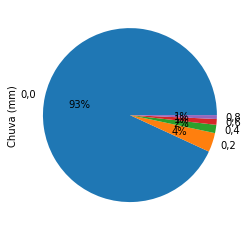

In [ ]:
dfMet['Chuva (mm)'].value_counts().head().plot.pie(autopct='%.0f%%')

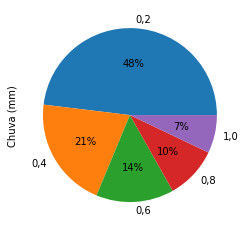

In [ ]:
teste = dfMet.copy()
teste.drop(teste.index[teste['Chuva (mm)'] == '0,0'], inplace = True)
teste['Chuva (mm)'].value_counts().head().plot.pie(autopct='%.0f%%')

## Outliers

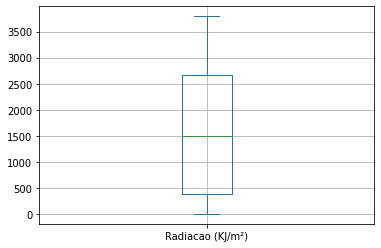

In [ ]:
result['Radiacao (KJ/m²)'].plot.box(grid = True, figsize=(6,4))

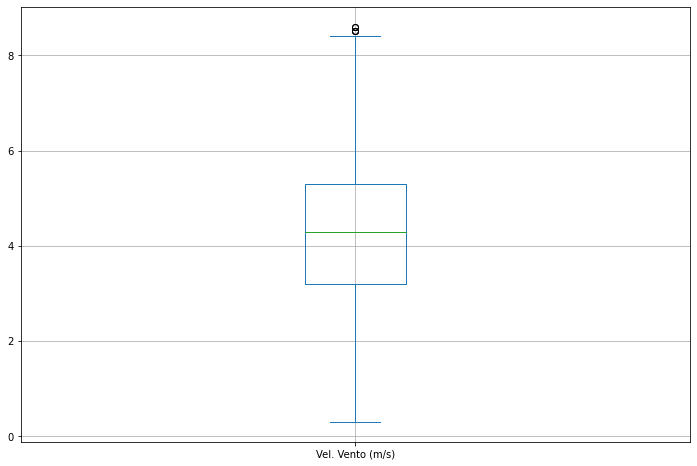

In [ ]:
result['Vel. Vento (m/s)'].plot.box(grid = True, figsize=(12,8))

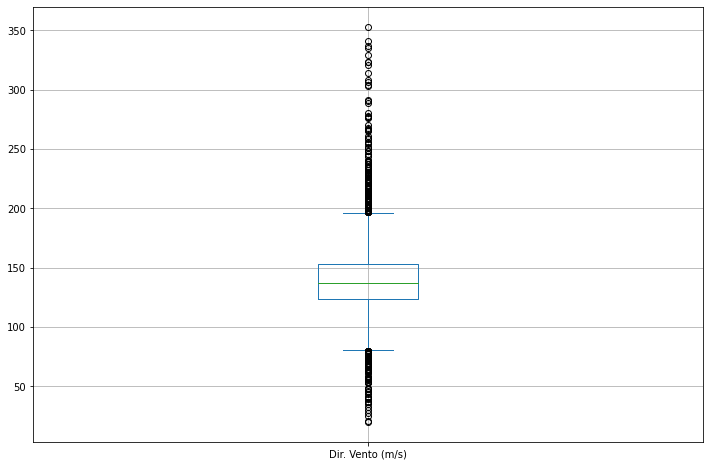

In [ ]:
result['Dir. Vento (m/s)'].plot.box(grid = True, figsize=(12,8))

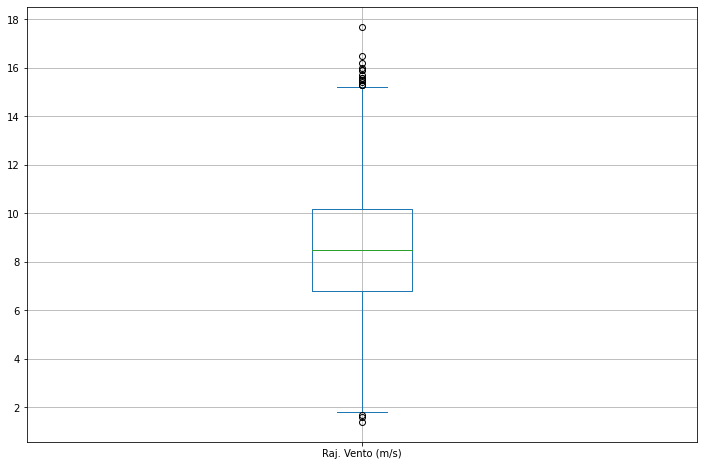

In [ ]:
result['Raj. Vento (m/s)'].plot.box(grid = True, figsize=(12,8))

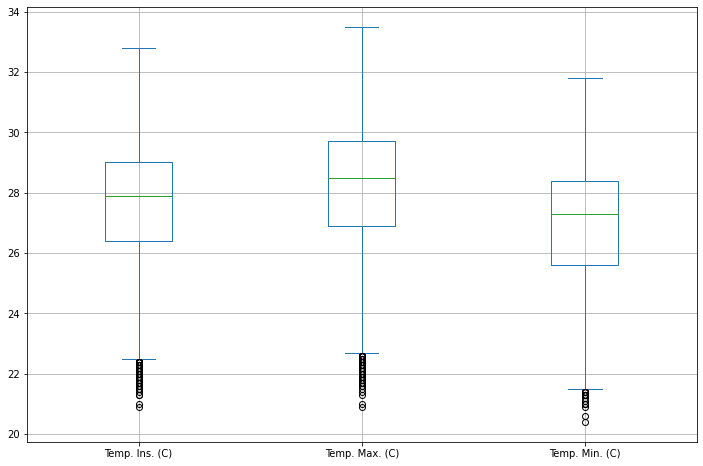

In [ ]:
colunas = ['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)']
result[colunas].plot.box(grid = True, figsize=(12,8))

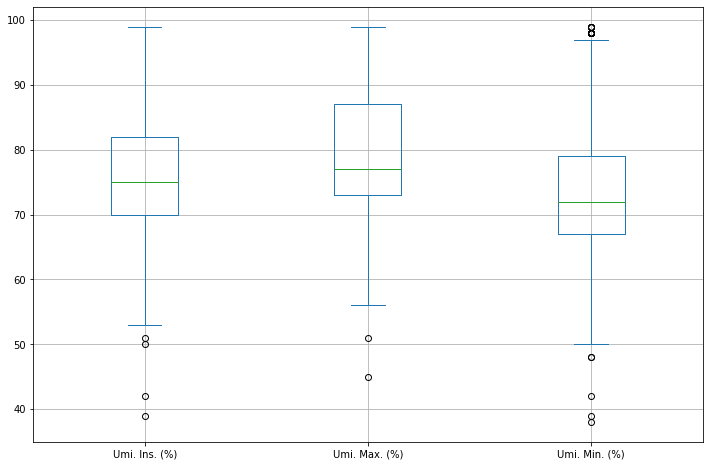

In [ ]:
colunas = ['Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)']
result[colunas].plot.box(grid = True, figsize=(12,8))

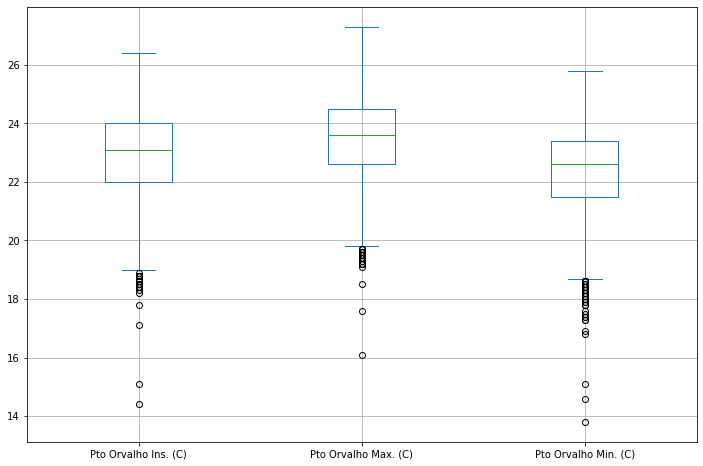

In [ ]:
colunas = ['Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)']
result[colunas].plot.box(grid = True, figsize=(12,8))

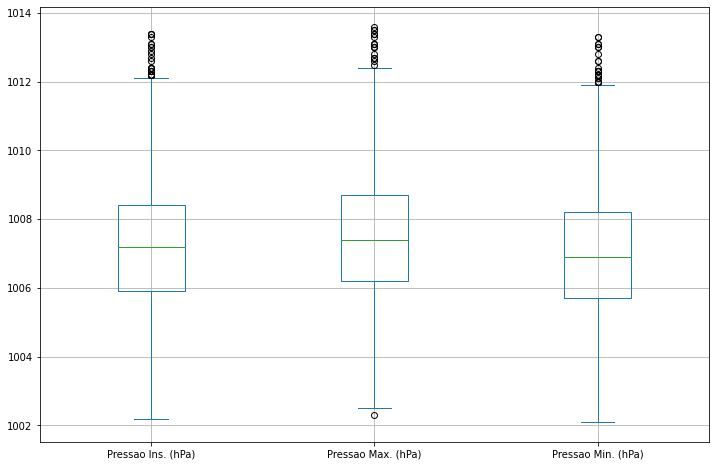

In [ ]:
colunas = ['Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)']
result[colunas].plot.box(grid = True, figsize=(12,8))

## Mapa de Calor

In [ ]:
relação = result[['Temp. Ins. (C)', 'Umi. Ins. (%)', 'Pto Orvalho Ins. (C)', 'Pressao Ins. (hPa)']]

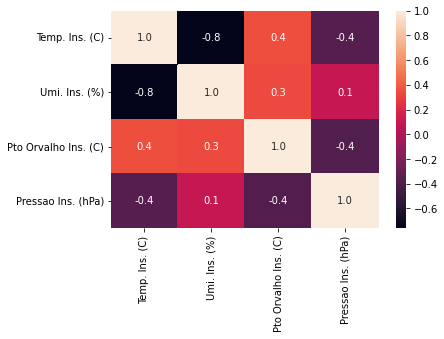

In [ ]:
corr = relação.select_dtypes(exclude='object').corr()
sb.heatmap(corr, annot=True, fmt=".1f")

## Dispersão

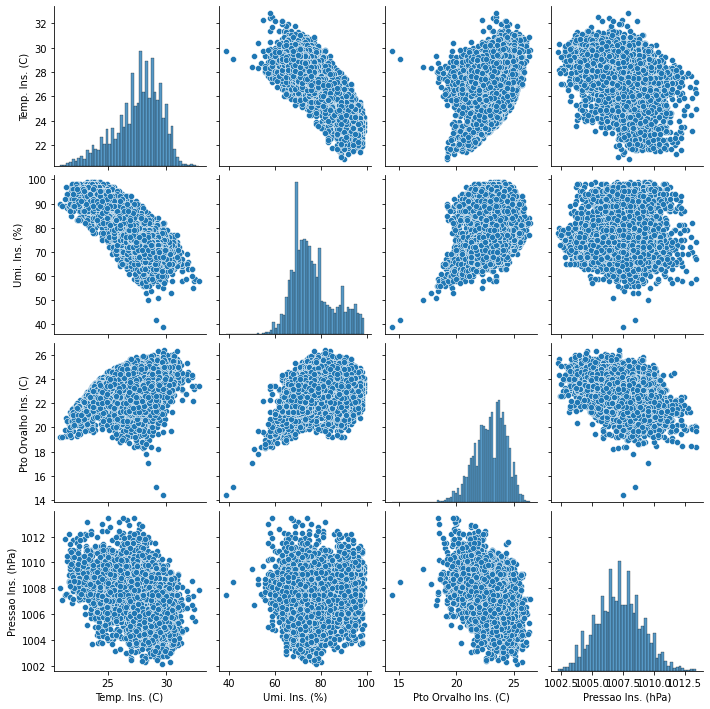

In [ ]:
sb.pairplot(data=result[['Temp. Ins. (C)', 'Umi. Ins. (%)', 'Pto Orvalho Ins. (C)', 'Pressao Ins. (hPa)']])